<a href="https://colab.research.google.com/github/Srinithimahalakshmi/Data_science/blob/main/task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
from google.colab import files
uploaded=files.upload()

Saving Student_Performance.csv to Student_Performance (1).csv


In [21]:
df=pd.read_csv("/content/Student_Performance.csv")

In [22]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [5]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [7]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [8]:
df.isnull().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,precision_score,recall_score,f1_score
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [24]:
features=['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']

In [32]:
encoder=LabelEncoder()
df['Extracurricular Activities'] = encoder.fit_transform(df['Extracurricular Activities'])


In [35]:
X = df.drop(['Performance Index'],axis=1)
Y = df['Performance Index']

In [36]:
X_test,X_train,Y_test,Y_train=train_test_split(X,Y,test_size=0.2,random_state=42)

In [37]:
model=RandomForestClassifier()
model.fit(X_train,Y_train)

RandomForestClassifier()

In [47]:
Y_pred=model.predict(X_test)
accuracy=accuracy_score(Y_test,Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = mse ** 0.5
r2 =r2_score(Y_test,Y_pred)
print(precision_score(Y_test,Y_pred,average='weighted',zero_division=1))
print(recall_score(Y_test,Y_pred,average='weighted',zero_division='warn'))
print(f1_score(Y_test,Y_pred,average='weighted',zero_division='warn'))
print("accuracy:",accuracy)
print("Rmse:",rmse)
print("r2 score:",r2)



0.11529429988313236
0.108875
0.106874170747559
accuracy: 0.108875
Rmse: 3.7480161419076095
r2 score: 0.9618967859625505


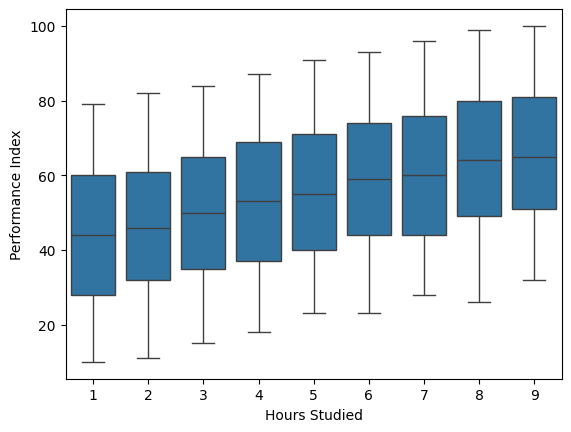

In [48]:
sns.boxplot(x=df['Hours Studied'],y=df['Performance Index'])
plt.show()

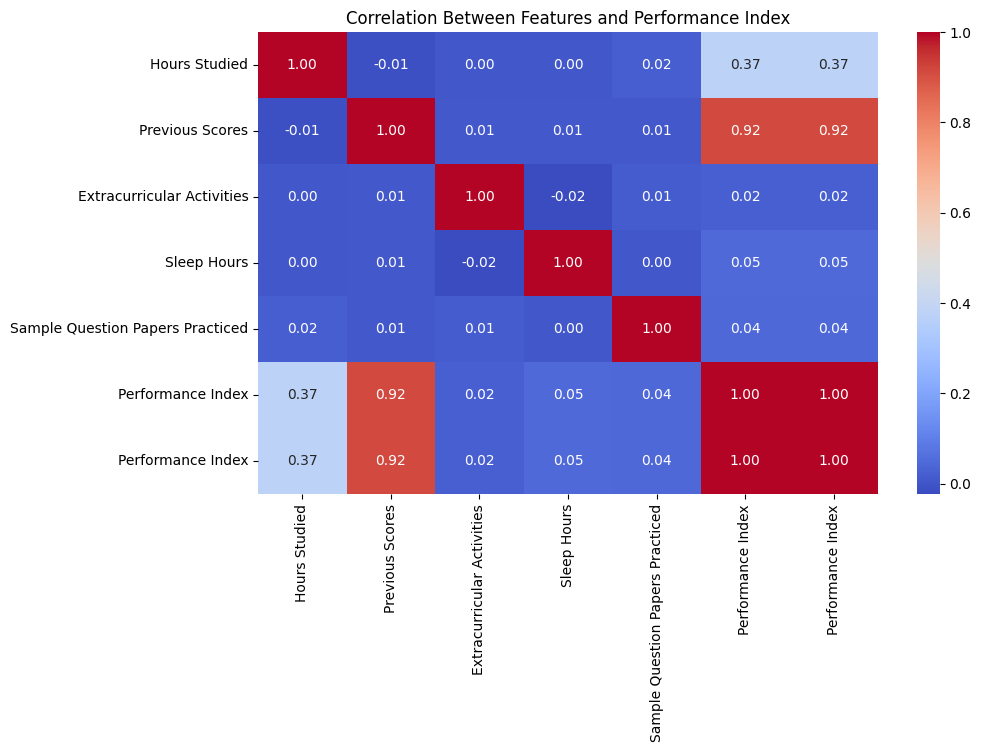

In [52]:
plt.figure(figsize=(10, 6))
corr = df[features + ["Performance Index"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Features and Performance Index")
plt.show()

In [54]:
data = pd.DataFrame([[7, 99, 1, 9, 1]], columns=X_train.columns)
prediction = model.predict(data)
print(prediction)

[91.]
